| <h1> Hands-on Activity 11.1 | <h1> Prepare a Dataset for LSTM and CNN </h1> |
|--- | --- |
**Name:** Jomarie Dupaya
**Course and Section:** CPE019, CPE32S3 <br>
**Instructor:** Engr. Roman Richard
**Date Performed:** 5/5/24
**Date Submitted:** 5/11/24

<hr>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("/content/IBM_2006-01-01_to_2018-01-01.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3020 non-null   object 
 1   Open    3019 non-null   float64
 2   High    3020 non-null   float64
 3   Low     3019 non-null   float64
 4   Close   3020 non-null   float64
 5   Volume  3020 non-null   int64  
 6   Name    3020 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 165.3+ KB


In [5]:
#Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

#Fill the missing Values
data['Open'].fillna(data['Open'].mean(), inplace=True)
data['Low'].fillna(data['Low'].mean(), inplace=True)

#Split the dataset into train and test
train = data[data['Date'].dt.year < 2017]
test = data[data['Date'].dt.year >= 2017]
print(data.info())
print("\nTraining Set Size:", len(train))
print("Test Set Size:", len(test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3020 entries, 0 to 3019
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    3020 non-null   datetime64[ns]
 1   Open    3020 non-null   float64       
 2   High    3020 non-null   float64       
 3   Low     3020 non-null   float64       
 4   Close   3020 non-null   float64       
 5   Volume  3020 non-null   int64         
 6   Name    3020 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 165.3+ KB
None

Training Set Size: 2769
Test Set Size: 251


**Ramarks:** The data column date was transofored into datetime by the pandas library to be, cleaned and processed ready. Next is handling missing value that was replaced by the fillna() command to complete the whole dataset.

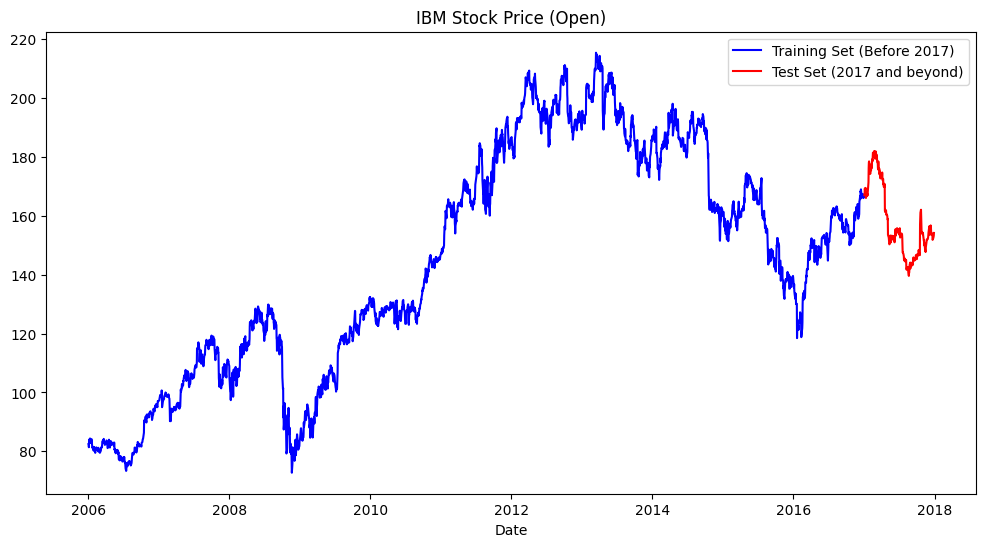

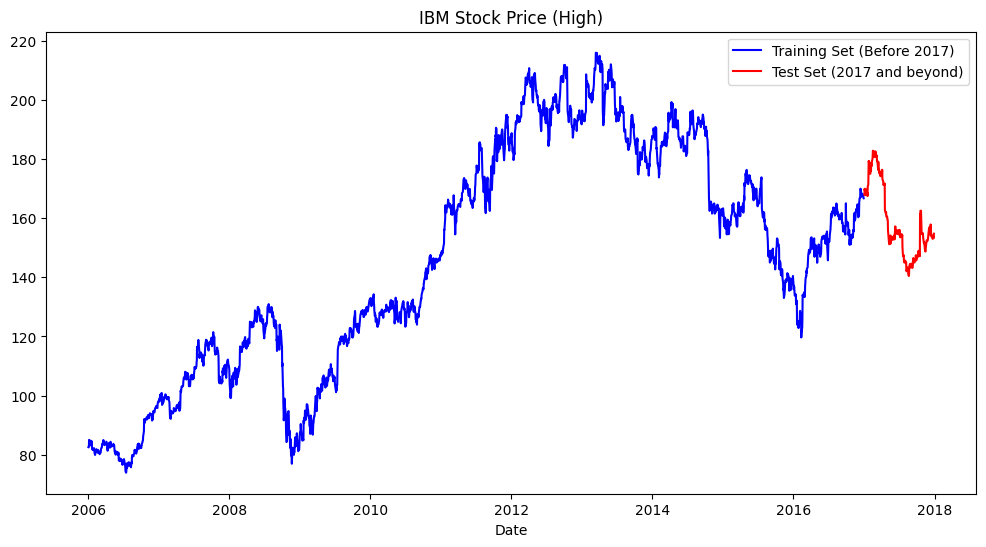

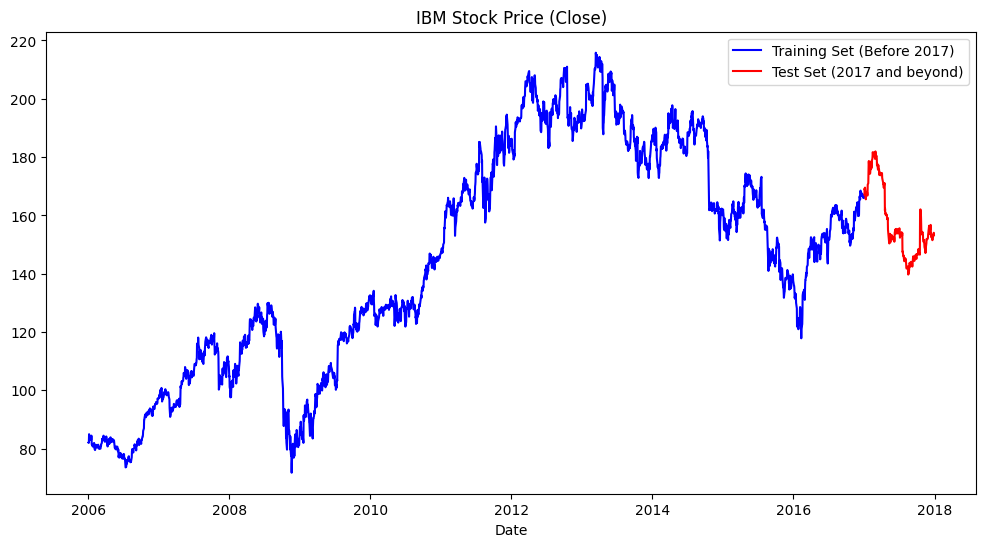

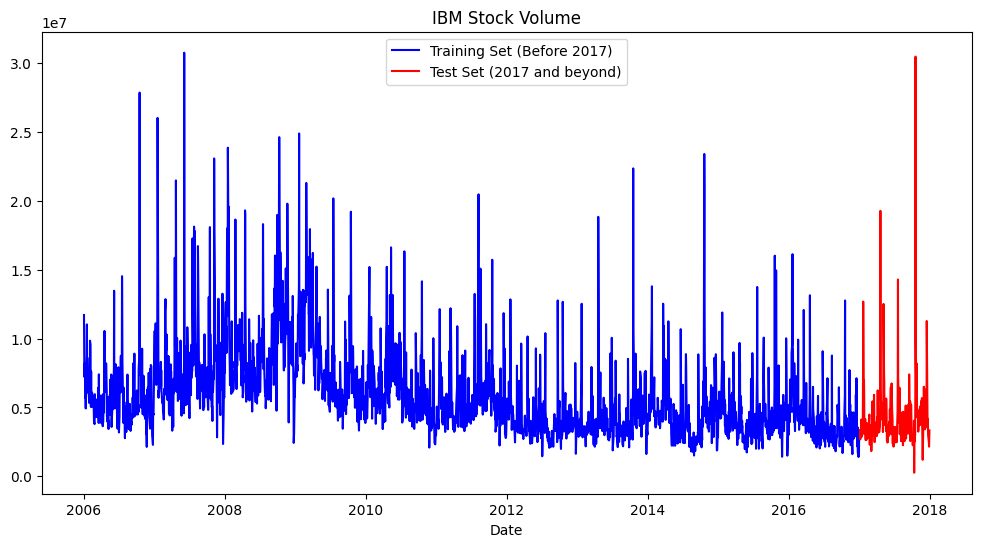

In [10]:
# Plot Open prices
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Open'], label='Training Set (Before 2017)', color='blue')
plt.plot(test['Date'], test['Open'], label='Test Set (2017 and beyond)', color='red')
plt.xlabel('Date')
plt.title('IBM Stock Price (Open)')
plt.legend()
plt.show()

# Plot High prices
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['High'], label='Training Set (Before 2017)', color='blue')
plt.plot(test['Date'], test['High'], label='Test Set (2017 and beyond)', color='red')
plt.xlabel('Date')
plt.title('IBM Stock Price (High)')
plt.legend()
plt.show()

# Plot Close prices
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Close'], label='Training Set (Before 2017)', color='blue')
plt.plot(test['Date'], test['Close'], label='Test Set (2017 and beyond)', color='red')
plt.xlabel('Date')
plt.title('IBM Stock Price (Close)')
plt.legend()
plt.show()

# Plot Volume
plt.figure(figsize=(12, 6))
plt.plot(train['Date'], train['Volume'], label='Training Set (Before 2017)', color='blue')
plt.plot(test['Date'], test['Volume'], label='Test Set (2017 and beyond)', color='red')
plt.xlabel('Date')
plt.title('IBM Stock Volume')
plt.legend()
plt.show()


**Remarks:** After splitting the data it is now then plotted which are for train and which are for test according to the target and feature values

In [13]:
from sklearn.preprocessing import MinMaxScaler
features = ['Open', 'High', 'Low', 'Close', 'Volume']
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(train[features])
train.loc[:, features] = scaled_features
print(train.head())

        Date      Open      High       Low     Close    Volume Name
0 2006-01-03  0.068073  0.060651  0.078108  0.071637  0.351221  IBM
1 2006-01-04  0.066321  0.060299  0.081699  0.070873  0.287408  IBM
2 2006-01-05  0.060712  0.063116  0.079420  0.074691  0.197981  IBM
3 2006-01-06  0.078589  0.078121  0.096064  0.091698  0.231473  IBM
4 2006-01-09  0.079641  0.072626  0.095856  0.083229  0.185886  IBM


**Remarks:** The dataset has been scalled into 0 and 1 to make the modelling more accurate.

In [19]:
# Define X_train and y_train
X_train = train[features].values
y_train = train[features].values

# Function to create the data structure with 60 timesteps
def create_dataset(X, y, time_steps=60):
    X_data, y_data = [], []
    for i in range(time_steps, len(X)):
        X_data.append(X[i - time_steps:i, :])
        y_data.append(y[i])
    return np.array(X_data), np.array(y_data)

# Create the data structure with 60 timesteps
X_train_lstm, y_train_lstm = create_dataset(X_train, y_train)

X_train_lstm = np.reshape(X_train_lstm, (X_train_lstm.shape[0], X_train_lstm.shape[1], X_train_lstm.shape[2]))

print("X_train_lstm shape:", X_train_lstm.shape)
print("y_train_lstm shape:", y_train_lstm.shape)


X_train_lstm shape: (2709, 60, 5)
y_train_lstm shape: (2709, 5)


**Remarks:** After doing the Cleaning, Exploratory data analysis, preprocessing and reshapping of the data. The dataset is now prepared for modelling for LSTM and CNN.